## Notes to self

- Adjust to PEP8 standards: https://www.python.org/dev/peps/pep-0008/
- Put notes about Why Naive Bayes earlier


In [2]:
%matplotlib inline

import json

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 30)

# set some nicer defaults for matplotlib
from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
"""
DAN: BEST PRACTICE IS TO NOT HAVE ANY RANDOM NUMBERS IN YOUR CODE. SOMETHING BIG LIKE THIS YOU WOULD PROBABLY
WANT TO PUT INTO A JSON OR CSV FILE AND LOAD IT AT RUNTIME. BIG BLOCKS OF NUMBERS RAISE QUESTIONS AND ARE HARDER TO 
MAINTAIN

THIS MATTERS LESS FOR DATA SCIENCEY NOTEBOOK CODE, BUT IS ABSOLUTE LAW FOR ANY KIND OF PRODUCTION CODE
"""
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]


"""
DAN: PUT COMMENTS HERE
"""
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'



def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    DAN: DO YOU EVER CALL THIS METHOD? WHY IS IT HERE?
    """

    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

ModuleNotFoundError: No module named 'requests'

In [ ]:
"""first, a note on scraping pitchfork: according to their robots.txt file, scraping is allowed,
as long as users aren't scraping any of their search pages.
User-agent: *
Allow: /
Disallow: /search/
Disallow: /search"""

## Scraping Pitchfork for Reviews

In [12]:
#attempt with the pitchfork api failed, not sure why. will scrape myself
import pitchfork
from bs4 import BeautifulSoup
#p = pitchfork.search('trans am', 'liberation')


In [133]:
#import the artists and albums from 'meddulla's github page
pitchfork_data = pd.read_csv(
    'https://gist.githubusercontent.com/meddulla/8277139/raw/f1595d50cada910d082bc1dfd8ef47ff49910cb3/pitchfork-reviews.csv',
           sep = ',')
pitchfork_data.head()

,artist,album,score,reviewer,url
0,Burial,Rival Dealer EP,9.0,Larry Fitzmaurice,http://pitchfork.com/reviews/albums/18820-buri...
1,The Thing,BOOT!,7.7,Aaron Leitko,http://pitchfork.com/reviews/albums/18735-the-...
2,Lumbar,The First And Last Days Of Unwelcome,7.7,Grayson Currin,http://pitchfork.com/reviews/albums/18705-lumb...
3,Bryce Hackford,Fair,7.0,Nick Neyland,http://pitchfork.com/reviews/albums/18789-bryc...
4,Waka Flocka Flame,DuFlocka Rant 2,7.1,Miles Raymer,http://pitchfork.com/reviews/albums/17760-waka...


In [134]:
print('min/mean/max: ',pitchfork_data.score.min(), pitchfork_data.score.mean(), pitchfork_data.score.max())
print('# reviews: ',len(reviews))

min/mean/max:  0.0 6.955978497748127 10.0
# reviews:  6884


In [649]:
#pull soup of text from a pitchfork review link
#can delete this cell
from bs4 import BeautifulSoup
import requests
r = requests.get(reviews.url[0])
soup = BeautifulSoup(r.text, 'lxml')

In [3]:
#input: urls in a pandas series format
#output: review text for each of those links as an array of strings

def get_multiple_reviews(urls):
    if isinstance(urls, pd.Series):
        review_text = []
        for link in urls:
            #pull url html into a beautifulsoup object
            r = requests.get(link)
            soup = BeautifulSoup(r.text, 'lxml')
            #pull all paragraph tags/contents with soup.findAll, and then put the text into one string
            
            
            """
            DAN: THERE IS BASICALLY NEVER A REASON TO USE THE map FUNCTION IN PYTHON. JUST STICK TO LIST COMPREHENSIONS.
            """
            review_text.append('\n\n'.join(map(str, [i.text for i in soup.findAll('p')])))
        
        """
        DAN: FUNCTIONS SHOULD ONLY HAVE ONE RETURN STATEMENT, AND IT SHOULD BE THE VERY LAST THING IN THE FUNCTION. MUCH
        EASIER TO KEEP TRACK OF THIS WAY
        """
        return review_text
    else:
        """
        DAN: THIS SHOULD BE AN EXCEPTION http://www.pythonforbeginners.com/error-handling/exception-handling-in-python
        """
        print('Check inputs - confirm they\'re in pd.Series format')
        return


In [336]:
#scraping pitchfork takes a while, so let's just sample a few hundred reviews
sample_df = pitchfork_data.sample(2000)
sample_reviews = get_multiple_reviews(sample_df.url)


In [337]:
sample_df['review'] = sample_reviews
sample_df.head()

,artist,album,score,reviewer,url,review
3454,Flying,Faces of the Night,5.8,Andrew Gaerig,http://pitchfork.com/reviews/albums/11490-face...,After playing avant-pop that fused Brooklyn's ...
3584,Arp,In Light,7.6,Mark Richardson,http://pitchfork.com/reviews/albums/11353-in-l...,Former Tussle member Alexis Georgopoulos reinv...
2855,The Very Best,Warm Heart of Africa,8.6,Brian Howe,http://pitchfork.com/reviews/albums/13518-warm...,Best new music\n\nThe full-length debut from t...
2131,Amazing Baby,Rewild,6.1,Nate Patrin,http://pitchfork.com/reviews/albums/13286-rewild/,These MGMT buddies have been the focus of a co...
1065,Psychedelic Horseshit,Laced,7.3,Marc Masters,http://pitchfork.com/reviews/albums/15425-laced/,"Now a duo, the self-proclaimed shitgaze band i..."


## Exploring the reviews data set

In [522]:
#Let's explore the data we've got a bit

"""
DAN: THIS CAN JUST BE print('# of reviews: ', len(sample_df))
"""

print('# of reviews: ', len(sample_df.review))
print('# of reviewers: ', len(sample_df.reviewer.unique()))


# of reviews:  2000
# of reviewers:  186


(array([ 80.,  19.,  26.,  12.,   7.,   2.,   6.,   3.,   4.,   4.,   2.,
          3.,   2.,   3.,   2.,   0.,   3.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   1. ,    3.5,    6. ,    8.5,   11. ,   13.5,   16. ,   18.5,
          21. ,   23.5,   26. ,   28.5,   31. ,   33.5,   36. ,   38.5,
          41. ,   43.5,   46. ,   48.5,   51. ,   53.5,   56. ,   58.5,
          61. ,   63.5,   66. ,   68.5,   71. ,   73.5,   76. ,   78.5,
          81. ,   83.5,   86. ,   88.5,   91. ,   93.5,   96. ,   98.5,
         101. ]),
 <a list of 40 Patch objects>)

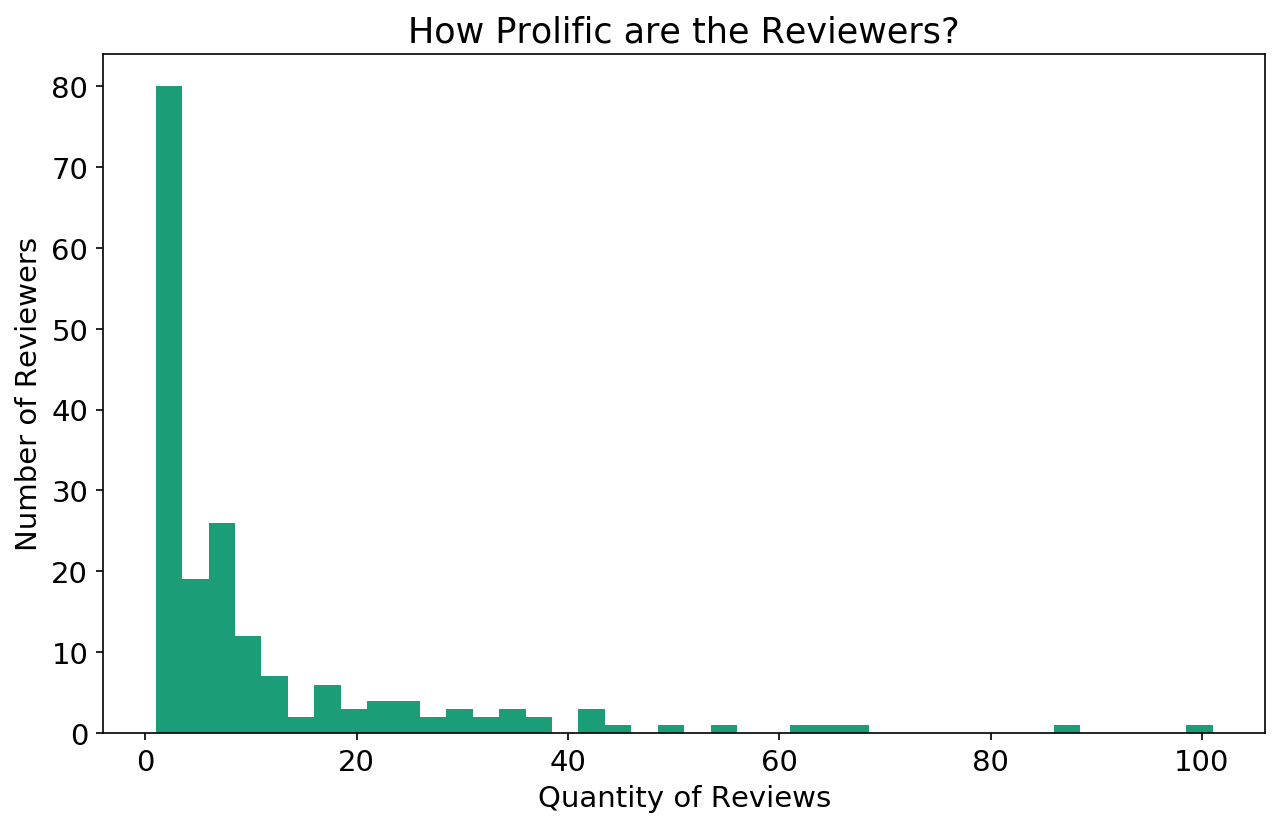

In [523]:
#Histogram to look at the spread of reviewers
plt.title('How Prolific are the Reviewers?')
plt.xlabel('Quantity of Reviews')
plt.ylabel('Number of Reviewers')
plt.hist(sample_df.groupby('reviewer').review.count(), bins=40)

In [524]:
"""
DAN: FUN. ALSO CHECK OUT Counter in the collections module. Pandas is more tool appropriate here, but Counter is
more efficient for other situations
"""

top_5_reviewers = sample_df.groupby('reviewer').review.count().nlargest(5)
print('The 5 most prolific reviewers:\n', top_5_reviewers)


The 5 most prolific reviewers:
 reviewer
Joe Tangari           101
Stephen M. Deusner     88
Brian Howe             67
Ian Cohen              65
Marc Hogan             61
Name: review, dtype: int64


(array([ 4.,  5.,  2.,  1.,  5.,  6.,  3.,  1.,  2.,  2.]),
 array([ 6.28275862,  6.43125695,  6.57975528,  6.72825362,  6.87675195,
         7.02525028,  7.17374861,  7.32224694,  7.47074527,  7.6192436 ,
         7.76774194]),
 <a list of 10 Patch objects>)

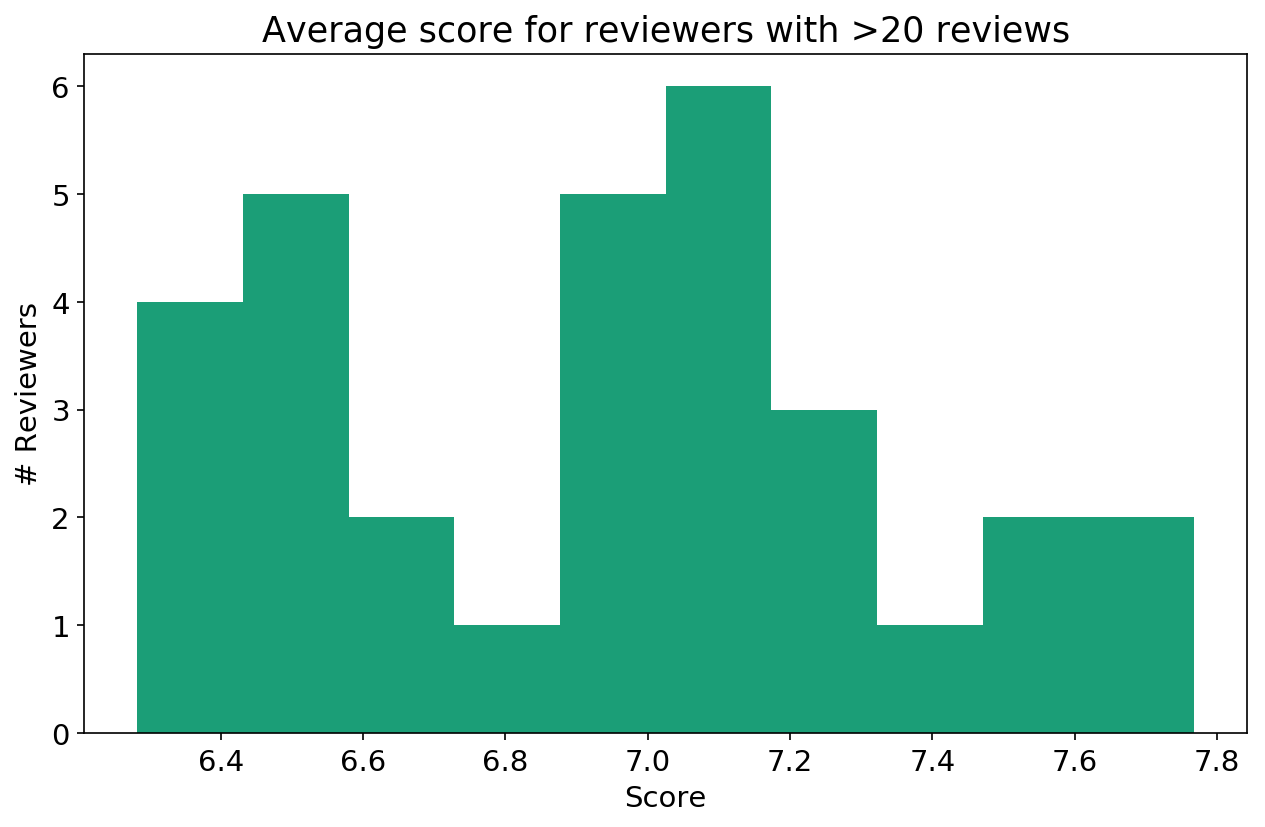

In [525]:
#pull the names of all reviewers with >20 reviews
#use that to get average reviews for relatively prolific reviewers
floor_score = 20
df_count = sample_df.groupby('reviewer').count()
df_mean = sample_df.groupby('reviewer').mean()

"""
DAN: In general you should use string format instead

"my string here is called: {}".format(variable_containing_name_of_string) 
"""

plt.title('Average score for reviewers with >%i reviews' %floor_score)
plt.ylabel('# Reviewers')
plt.xlabel('Score')
plt.hist(df_mean[sample_df.groupby('reviewer').count().review>floor_score].score)


In [ ]:
"""
DAN: I see that you're using a cutoff score to frame this problem as a classification problem (bad review vs good review)
In reality, you may want this to be a regression problem (predict the exact score). Try that out too (you need to use
a different model of course, maybe linear regression?)
"""

In [630]:
cutoff_score = 7
print('Percent of reviews are \'good\' new music (>%i.0): ' %cutoff_score, sum(sample_df.score>7.0)/sum(sample_df.score>0)*100)
#originally I had a cutoff_score of 8, but 7 seemed easier for my poor little model

Percent of reviews are 'good' new music (>7.0):  54.25


In [527]:
#this concludes the exploratory analysis
sample_df.head()

,artist,album,score,reviewer,url,review
3454,Flying,Faces of the Night,5.8,Andrew Gaerig,http://pitchfork.com/reviews/albums/11490-face...,After playing avant-pop that fused Brooklyn's ...
3584,Arp,In Light,7.6,Mark Richardson,http://pitchfork.com/reviews/albums/11353-in-l...,Former Tussle member Alexis Georgopoulos reinv...
2855,The Very Best,Warm Heart of Africa,8.6,Brian Howe,http://pitchfork.com/reviews/albums/13518-warm...,Best new music\n\nThe full-length debut from t...
2131,Amazing Baby,Rewild,6.1,Nate Patrin,http://pitchfork.com/reviews/albums/13286-rewild/,These MGMT buddies have been the focus of a co...
1065,Psychedelic Horseshit,Laced,7.3,Marc Masters,http://pitchfork.com/reviews/albums/15425-laced/,"Now a duo, the self-proclaimed shitgaze band i..."


In [4]:
"""
DAN: YOUR EXPLORATORY ANALYSIS WAS ALL ABOUT THE REVIEWERS AND THEIR CHARACTERISTICS, BUT YOUR MODEL IS TRAINED ON 
BOW REVIEWS? THAT DOESN'T MAKE ANY SENSE. IF YOUR GOAL IS MODEL CONSTRUCTION YOUR EXPLORATORY ANALYSIS SHOULD INFORM 
THAT GOAL.

FIRST, REVIEWER SHOULD BE A FEATURE OF YOUR MODEL

SECOND, YOU SHOULD DO SOME EXPLORATORY ANALYSIS OF WORDS. IF YOU DID THAT, YOU'D FIND OUT ALL KINDS OF USEFUL STUFF. LIKE 
THE FACT THAT YOUR MODEL IS BASICALLY JUST MEMORIZING PARTICULAR WORDS AND ASSOCIATING THEM WITH SCORES RATHER THAN DOING
ANY KIND OF USEFUL SEMANTIC REASONING, BECAUSE YOUR VOCABULARY SIZE IS a zillion TIMES LARGER THAN YOUR DATASET SIZE

ALSO, general rule of thumb: If your training performance is higher than your testing performance, you need more data. 
If your training performance is shit, you need a better model. 

a fun challenge would be seeing if you can get the model to learn this mapping WITHOUT significantly 
increasing the dataset size (beyond like 10000 reviews or so)

Some tips:

- Visualize the distributions of the words in the reviews and try to come up with some better features. I.e. do 
you really think the number of times that the words "the" or "a" appear is as important as words like "bad" or "good"?
- Try out more explicit features. What about the length of the review? The number of capitalized words?
- Be aware of capitalization. Do you want Bad and bad to be different features? The more features, the easier it is 
for your model to overfit and the harder it is for it to learn
- 
- If you want to take your NLP game a step farther, check out word vectors: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/



"""

"\nDAN: YOUR EXPLORATORY ANALYSIS WAS ALL ABOUT THE REVIEWERS AND THEIR CHARACTERISTICS, BUT YOUR MODEL IS TRAINED ON \nBOW REVIEWS? THAT DOESN'T MAKE ANY SENSE. IF YOUR GOAL IS MODEL CONSTRUCTION YOUR EXPLORATORY ANALYSIS SHOULD INFORM \nTHAT GOAL.\n\nFIRST, REVIEWER SHOULD BE A FEATURE OF YOUR MODEL\nSECOND, YOU SHOULD DO SOME EXPLORATORY ANALYSIS OF WORDS. IF YOU DID THAT, YOU'D FIND OUT ALL KINDS OF USEFUL STUFF. LIKE \nTHE FACT THAT YOUR MODEL IS BASICALLY JUST MEMORIZING PARTICULAR WORDS AND ASSOCIATING THEM WITH SCORES RATHER THAN DOING\nANY KIND OF USEFUL SEMANTIC REASONING, BECAUSE YOUR VOCABULARY SIZE IS HUNDREDS OF TIMES LARGER THAN YOUR DATASET SIZE\n\nIN GENER\n\n"

## Train Classifier

In [631]:
#Now we'll transform each review into a 'bag of words' using sklearn, in order to create input for our models
#we'll also make a y data frame, determining if the reviews are best new music or not
bnm = sample_df.score>cutoff_score
y = bnm.astype(int).values

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 0)
vectorizer.fit(sample_df.review)
x = vectorizer.transform(sample_df.review)
x = x.toarray()

print('Number of words analyzed: ', len(vectorizer.get_feature_names()))
print('Average words per article: ', np.array([i.sum() for i in x]).mean())



Number of words analyzed:  49458
Average words per article:  647.863


In [529]:
#Same as above but as a function
#critics is the dataframe of reviews, etc.
from sklearn.feature_extraction.text import CountVectorizer

def make_xy(critics, vectorizer=None):
    bnm = critics.score>cutoff_score
    y = bnm.astype(int).values

    vectorizer = CountVectorizer(min_df = 0)
    vectorizer.fit(critics.review)
    x = vectorizer.transform(critics.review)
    x = x.toarray()
    
    return x, y

X, Y = make_xy(sample_df)

print('Number of words analyzed: ', len(vectorizer.get_feature_names()))
print('Average words per article: ', np.array([i.sum() for i in X]).mean())


Number of words analyzed:  49458
Average words per article:  647.863


In [ ]:
"""
DAN: ACCURACY IS A BULLSHIT METRIC. 

https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it/

BEST CLASSIFICATION METRIC IS AUROC (aka AUC aka ROC aka AUCROC)
https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it


What is 80% of the reviews were bad and your model just always predicted "bad review"? That'd be 80% accuracy. 
"""

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#split our data into training data (80%) and testing (20%)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

#fit the naive bayes model
nb = MultinomialNB(alpha=0.7) 
nb.fit(xtrain, ytrain)

#test training prediction
print('training accuracy: ', sum(nb.predict(xtrain)==ytrain)/len(ytrain))
print('testing accuracy: ', sum(nb.predict(xtest)==ytest)/len(ytest))
#well this model is most definitely overfit - training performance is much better than testing
#also with just 15% of music as bnm, I'm concerned with 81% accuracy


training accuracy:  0.993125
testing accuracy:  0.6525


In [ ]:
"""
DAN: NAIVE BAYES NOTORIOUSY HAS SHIT CALIBRATION (EXTREME FRIENDLY), AND IN GENERAL MODELS THAT AREN'T EXPLICITLY CALIBRATED ALL HAVE 
SHIT CALIBRATION. IF YOU WANT RELIABLE CONFIDENCE METRICS, YOU NEED TO USE AN EXPLICIT CALIBRATION TECHNIQUE.

CHECK OUT http://scikit-learn.org/stable/modules/calibration.html

"""

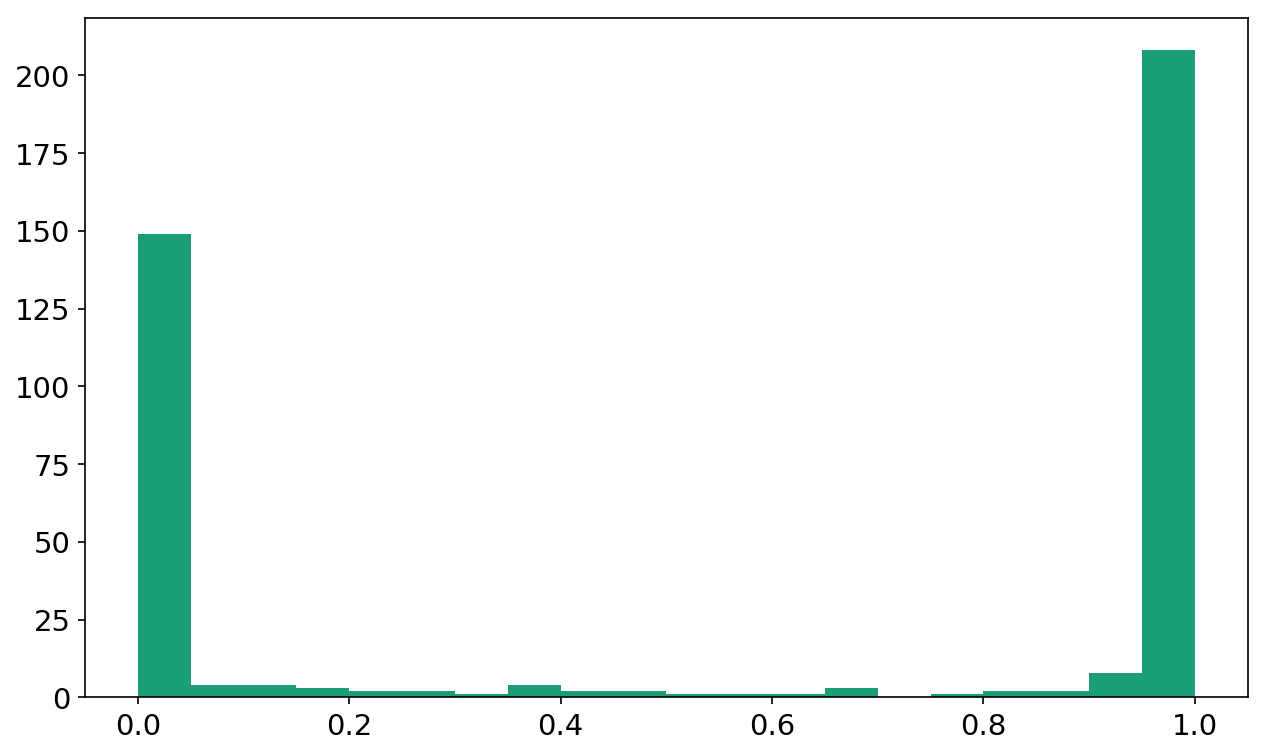

In [546]:
#let's assess whether our model is well-calibrated (i.e. whether its confidence % is about equal to its accuracy %)
hst = plt.hist(nb.predict_proba(xtest)[:,1], bins=20)


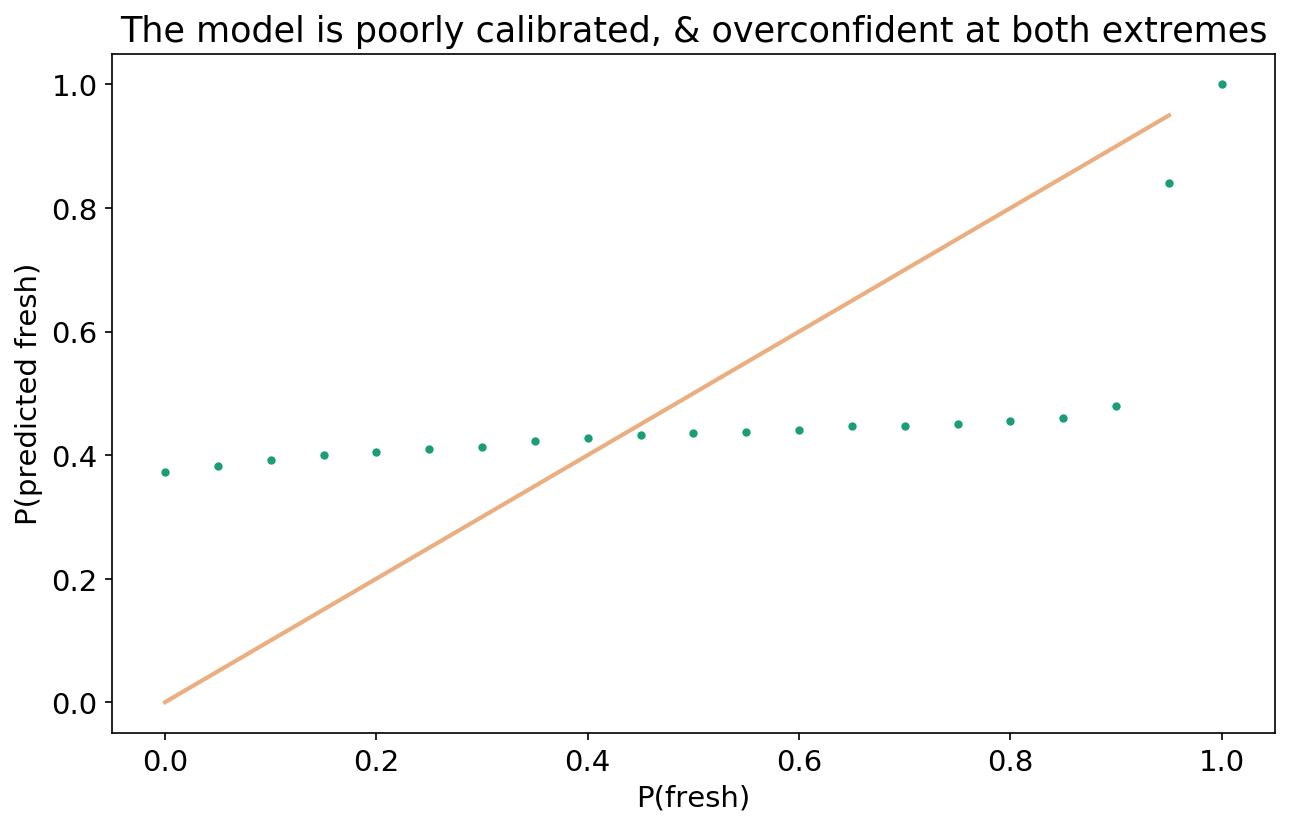

In [629]:
"""
DAN: JESUS DUDE EVER HEAR OF LINE BREAKS? :) 
"""

bin_counts = hst[0]
probabilities = nb.predict_proba(xtest)
digits = np.digitize(probabilities[:,1], hst[1])

#next step is to figure out what % of each bin in our test data is fresh
#so we'll need to assign ytest to bins per digits
binframe = pd.DataFrame({'y':ytest, 'bin':digits})
bnm_prob = binframe.groupby('bin').sum()/binframe.groupby('bin').count()
#number of reviews in each bin divided by the total number of (test) reviews
pct_df = binframe.groupby('bin').count()/binframe.bin.count()
#pct_df won't have the right # of items if the bins aren't nicely distributed, so we'll pad it
ind = list(range(1,len(hst[0])+2))
indy_df = pd.DataFrame({'b':np.zeros(len(ind))}, index=ind)
indy_df = indy_df.join(pct_df)
indy_df = indy_df.max(axis=1)
#plot the cumulative distribution function
plt.xlabel('P(fresh)')
plt.ylabel('P(predicted fresh)')
plt.title('The model is poorly calibrated, & overconfident at both extremes')
#plt.plot(hst[1][:-1], np.cumsum(pct_df.values),'.')
plt.plot(hst[1], np.cumsum(indy_df.values),'.')
plt.plot(hst[1][:-1],hst[1][:-1], alpha=.5)


"""
DAN: THIS PLOT IS HARD TO UNDERSTAND. TRY PUTTING A LEGEND ON IT WITH PLT.LEGEND
"""

In [ ]:
"""

DAN: I STOPPED REVIEWING HERE BECAUSE IT LOOKS LIKE STUFF BELOW HERE ISN'T REALLY PUT TOGETHER


"""

In [426]:
#So this model is poorly calibrated, and its test accuracy is not too impressive (although better 
#than random guessing, at least)
#hopefully we can improve it by adjusting our hyperparameters
#alpha, our smoothing parameter, will help decrease the pull of any particular variable



In [516]:
#sklearn.cross_validation.cross_val_score(clf, x, y, scorer=log_likelihood)

#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
max_loglike = -np.inf

for a in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        X, Y = make_xy(sample_df, vectorizer)
        
        xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)
        #fit the naive bayes model
        nb = MultinomialNB()
        #nb.set_params(alpha=a) #i don't understand why this doesn't work
        #^alpha trouble
        nb.fit(xtrain, ytrain)
        #nll = cv_score(nb, X, Y) #function below already implements kfold validation
        nll = sklearn.cross_validation.cross_val_score(nb, xtest, ytest, scoring='neg_log_loss')
        if sum(nll) > max_loglike:
            max_loglike = sum(nll)
            best_alpha = alpha
            best_min_df = min_df
        

In [503]:
print(max_loglike, '|', best_alpha, '|', best_min_df)

#log: 0.1/0.1
#same

-26.4606640453 | 0.1 | 0.1


In [454]:
import sklearn.model_selection
ll = sklearn.cross_validation.cross_val_score(nb, xtest, ytest, scoring='neg_log_loss')
sum(ll)
#-12... pretty bad! 0.683 is as good as random guessing...
#pre optimization: array([-12.71206784,  -9.92044569,  -9.87049272])
#the sum of neg log loss was -37.09

-37.090407947805367

In [468]:
#this cell obsolete

from sklearn.cross_validation import KFold

def cv_score(clf, x, y, score_func=0):
    result = 0
    nfold = 5
    for train, test in KFold(y.size, nfold):
        nb.fit(x[train], y[train])
        result += sklearn.cross_validation.cross_val_score(
            clf, x[test], y[test], scoring='neg_log_loss')
    return result/nfold



## Some interpretation

In [636]:
#testing to see which words indicated good results vs. poor
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = nb.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

In [643]:
print('good words: ',words[ind[:10]])
print('bad words: ',words[ind[-10:]])

good words:  ['mingus' 'mercer' 'lucksmiths' 'bronson' 'bloom' 'vee' 'orcutt' 'chatham'
 'july' 'konk']
bad words:  ['jenkinson' 'perkins' 'mehlan' 'jae' 'gough' 'watain' 'vikernes' 'slater'
 'rice' 'lytle']


Looks like the best predictor of an album's success is who made it. That makes perfect sense and actually gives me more confidence in the model...


In [667]:
#custom review testing
print(nb.predict_proba(vectorizer.transform(
    ['awful tinny repetitive boring dull'])))
print(nb.predict_proba(vectorizer.transform(
    ['rich experimental complex excellent luxurious'])))
print(nb.predict_proba(vectorizer.transform(
    ['kanye'])))


[[ 0.96405948  0.03594052]]
[[ 0.20648061  0.79351939]]
[[ 0.52786703  0.47213297]]


## Various testing for inputting alpha
I was able to get it to work outside of the gridsearch but not within


In [469]:
cv_score(nb, x, y)

array([-12.13488975, -11.74472142, -11.94645674])

In [489]:
nb = MultinomialNB()
nb.set_params(alpha=.1)
nb.fit(xtrain, ytrain)
nb.predict(xtrain)

array([0, 0, 1, ..., 0, 1, 0])

In [501]:
vectorizer = CountVectorizer(min_df = min_df)       
X, Y = make_xy(sample_df, vectorizer)
        
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)
#fit the naive bayes model
nb = MultinomialNB(alpha=1)
#nb.set_params(alpha=1)
nb.fit(xtrain, ytrain)
#nll = cv_score(nb, X, Y) #function below already implements kfold validation
nll = sklearn.cross_validation.cross_val_score(nb, xtest, ytest, scoring='neg_log_loss')
sum(nll)

-35.022955315311577

In [514]:
alphas = [0, .1, 1, 5, 10, 50]
for a in alphas:
    print(type(a))

<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
